# Análise de Sentimento em Feedbacks de Clientes a partir de Áudio

**Objetivo:**

Desenvolver um sistema que converta áudios de feedback de clientes em texto
e realize uma análise de sentimentos, classificando-os como positivos, negativos
ou neutros

Alunas:


*   Carolina Nascimento Silva
*   Nicoly Oliveira Avelino



## Upload de arquivos

In [26]:
from google.colab import files
uploaded = files.upload()


Saving positivo4.m4a to positivo4.m4a
Saving negativo4.mp3 to negativo4.mp3
Saving neutro2.m4a to neutro2.m4a
Saving positivo3.m4a to positivo3.m4a
Saving negativo3.m4a to negativo3.m4a
Saving negativo1.mp3 to negativo1.mp3
Saving negativo2.mp3 to negativo2.mp3
Saving neutro1.mp3 to neutro1.mp3
Saving positivo1.mp3 to positivo1.mp3
Saving positivo2.mp3 to positivo2.mp3


## Transcrição de Áudio para Texto
 A Biblioteca de Transcrição escolhida foi a OpenAI Whisper.

In [49]:
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
print("Arquivos enviados:", uploaded.keys())

Arquivos enviados: dict_keys(['positivo4.m4a', 'negativo4.mp3', 'neutro2.m4a', 'positivo3.m4a', 'negativo3.m4a', 'negativo1.mp3', 'negativo2.mp3', 'neutro1.mp3', 'positivo1.mp3', 'positivo2.mp3'])


In [51]:
import whisper

# Carregando modelo
model = whisper.load_model("base")

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)


In [52]:
transcriptions = {}

for filename in uploaded.keys():
    result = model.transcribe(filename, language="pt")
    transcriptions[filename] = result['text']

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/

In [53]:
import pandas as pd

In [54]:
# Criar um DataFrame com os resultados das transcrições
data = {
    "Arquivo": list(transcriptions.keys()),
    "Transcrição": list(transcriptions.values())
}

df = pd.DataFrame(data)
df.to_csv("transcricoes.csv", index=False)


In [55]:
df

,Arquivo,Transcrição
0,positivo4.m4a,Eu gostei muito do produto. A entrega foi ráp...
1,negativo4.mp3,"Eu não gostei do produto, pois eles não atend..."
2,neutro2.m4a,"O produto, ele atendeu as minhas expectativas..."
3,positivo3.m4a,"Produto de ótima qualidade, muito bom mesmo, ..."
4,negativo3.m4a,produto de péssima qualidade não compraria de...
5,negativo1.mp3,"A entrega foi uma grande decepção, atrasou mu..."
6,negativo2.mp3,"Não gostei do produto, o preço não vale o que..."
7,neutro1.mp3,"O produto tem seus pontos positivos, mas ache..."
8,positivo1.mp3,O design do produto é incrivelmente moderno e...
9,positivo2.mp3,A qualidade dos materiais utilizados é realme...


### Visualizar algumas transcrições

In [34]:
from IPython.display import Audio

In [36]:
Audio("/content/neutro1.mp3")

In [39]:
transcriptions['neutro1.mp3']

' O produto tem seus pontos positivos, mas achei que o preço não compensa pelo que oferece, e a entrega poderia ter sido mais organizada para evitar atrasos.'

In [45]:
Audio("/content/neutro2.m4a")

In [46]:
transcriptions['neutro2.m4a']

' O produto, ele atendeu as minhas expectativas. O material dele é ok e a loja responde rápido.'

## Análise de Sentimento no Texto

In [56]:
!pip install -q textblob
!pip install -q googletrans==4.0.0-rc1

In [63]:
from textblob import TextBlob
from googletrans import Translator

translator = Translator()

sentiment_results = {}


In [64]:
for filename, text in transcriptions.items():
    # Traduzir para inglês para melhor entendimento do blob
    translated_text = translator.translate(text, src="pt", dest="en").text

    # analisar sentimento
    blob = TextBlob(translated_text)
    polarity = blob.sentiment.polarity  # Polaridade entre -1 e +1
    sentiment = "positivo" if polarity > 0 else "negativo" if polarity < 0 else "neutro"

    sentiment_results[filename] = {
        "texto_original": text,
        "texto_traduzido": translated_text,
        "polaridade": polarity,
        "sentimento": sentiment
    }

In [65]:
#  resultados
for filename, result in sentiment_results.items():
    print(f"\nArquivo: {filename}")
    print(f"Texto Original: {result['texto_original']}")
    print(f"Texto Traduzido: {result['texto_traduzido']}")
    print(f"Sentimento: {result['sentimento']}")
    print(f"Polaridade: {result['polaridade']}")


Arquivo: positivo4.m4a
Texto Original:  Eu gostei muito do produto. A entrega foi rápida, o vendedor é muito atencioso e a descrição corresponde exatamente ao produto. Muito bom!
Texto Traduzido: I really liked the product.The delivery was fast, the seller is very attentive and the description corresponds to the product.Very good!
Sentimento: positivo
Polaridade: 0.5487500000000001

Arquivo: negativo4.mp3
Texto Original:  Eu não gostei do produto, pois eles não atendem as minhas expectativas, chegou atrasado, na descrição falava uma coisa, quando chegou foi o tratatualmente contário do que eu esperava, então por isso eu não vou comprar mais.
Texto Traduzido: I did not like the product, because they did not meet my expectations, arrived late, in the description said something, when it arrived it was the deal of contained container of what I expected, so I will not buy anymore.
Sentimento: negativo
Polaridade: -0.2

Arquivo: neutro2.m4a
Texto Original:  O produto, ele atendeu as minhas 

In [67]:
import pandas as pd

# Criar um DataFrame com os resultados
data = {
    "Arquivo": list(sentiment_results.keys()),
    "Texto Original": [result["texto_original"] for result in sentiment_results.values()],
    "Texto Ingles": [result["texto_traduzido"] for result in sentiment_results.values()],
    "Polaridade": [result["polaridade"] for result in sentiment_results.values()],
    "Sentimento": [result["sentimento"] for result in sentiment_results.values()]
}

df = pd.DataFrame(data)

# Salvar em um arquivo CSV
df.to_csv("sentimentos_textblob.csv", index=False)



In [68]:
df

,Arquivo,Texto Original,Texto Ingles,Polaridade,Sentimento
0,positivo4.m4a,Eu gostei muito do produto. A entrega foi ráp...,I really liked the product.The delivery was fa...,0.548750,positivo
1,negativo4.mp3,"Eu não gostei do produto, pois eles não atend...","I did not like the product, because they did n...",-0.200000,negativo
2,neutro2.m4a,"O produto, ele atendeu as minhas expectativas...","The product, he met my expectations.His materi...",0.350000,positivo
3,positivo3.m4a,"Produto de ótima qualidade, muito bom mesmo, ...","Product of great quality, very good, met my ex...",0.855000,positivo
4,negativo3.m4a,produto de péssima qualidade não compraria de...,Poor quality product would not buy again or co...,-0.400000,negativo
5,negativo1.mp3,"A entrega foi uma grande decepção, atrasou mu...","Delivery was a great disappointment, it delaye...",-0.266667,negativo
6,negativo2.mp3,"Não gostei do produto, o preço não vale o que...","I did not like the product, the price is not w...",-0.150000,negativo
7,neutro1.mp3,"O produto tem seus pontos positivos, mas ache...","The product has its positive points, but I tho...",0.169318,positivo
8,positivo1.mp3,O design do produto é incrivelmente moderno e...,Product design is incredibly modern and intuit...,0.000000,neutro
9,positivo2.mp3,A qualidade dos materiais utilizados é realme...,The quality of the materials used is really im...,0.900000,positivo


## Conclusões

<ipython-input-71-3bbdcbea420f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


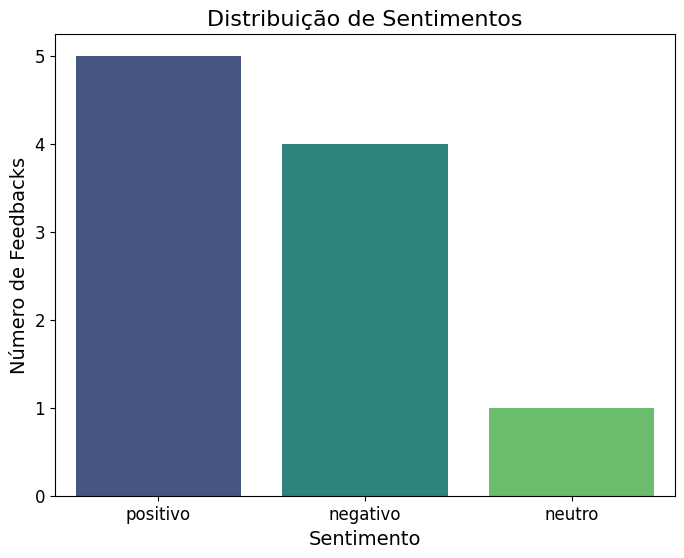

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df["Sentimento"].value_counts() # quantidade de cada sentimento


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribuição de Sentimentos", fontsize=16)
plt.xlabel("Sentimento", fontsize=14)
plt.ylabel("Número de Feedbacks", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


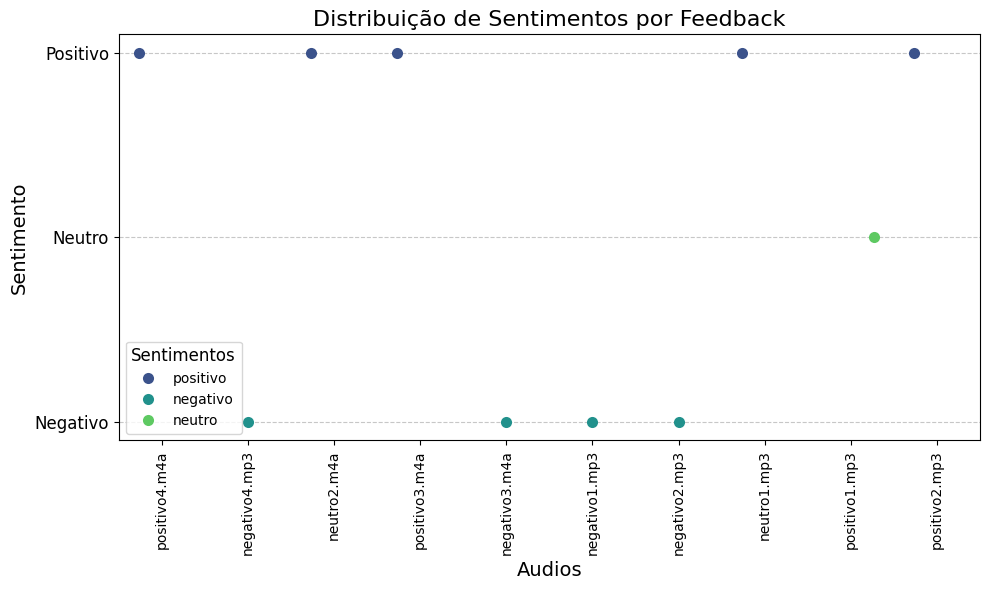

In [77]:
sentiment_mapping = {"positivo": 1, "neutro": 0, "negativo": -1}
df["Sentimento_Num"] = df["Sentimento"].map(sentiment_mapping)

# Criar o gráfico para melhor visualização de sentimentos por audio
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x="Arquivo", y="Sentimento_Num", hue="Sentimento", palette="viridis", jitter=0.3, size=8, dodge=True)

plt.title("Distribuição de Sentimentos por Feedback", fontsize=16)
plt.xlabel("Audios", fontsize=14)
plt.ylabel("Sentimento", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks([-1, 0, 1], ["Negativo", "Neutro", "Positivo"], fontsize=12)
plt.legend(title="Sentimentos", fontsize=10, title_fontsize=12, loc='lower left' )
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<ipython-input-78-4c6293ce5bbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Sentimento", y="Polaridade", jitter=0.2, size=10, palette="viridis")


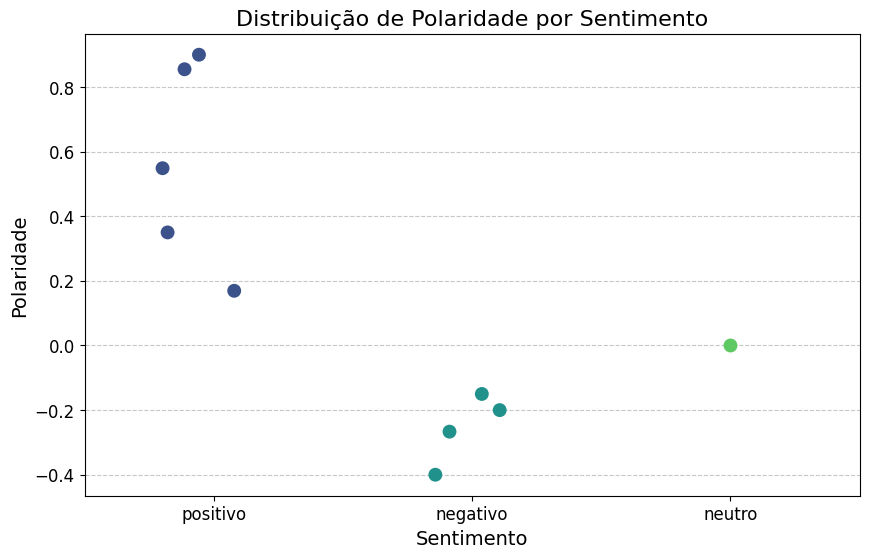

In [78]:
# Gráfico de pontos - Polaridade por feedback
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x="Sentimento", y="Polaridade", jitter=0.2, size=10, palette="viridis")
plt.title("Distribuição de Polaridade por Sentimento", fontsize=16)
plt.xlabel("Sentimento", fontsize=14)
plt.ylabel("Polaridade", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()